In [2]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

## 형태학적 처리
- 주변 잡음을 어떻게 제거하고, 내부의 빈 부분을 어떻게 채울지
- 271p

### 침식과 팽창 연산 (cv2.erode/dilate)
- 주변정보 참고한다는 점에서 필터링과 비슷하긴한데
- 가중치가 비슷하다 보고 mask 입력영상이 
- binary 에 적용
- 침식: 입력화소와 형태소가 하나라도 일치하지 않으면 0  (and에 가깝고)
- 주변에 빈 거하나라도 있으면 0 출력

- 팽창: 하나라도일치하면 1

- shape: rec/cross(수평수직만 고려: 덜깎고 덜팽창함)

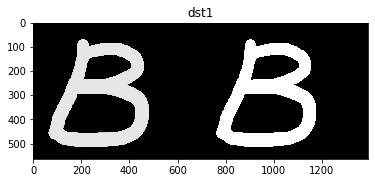

In [2]:
src= cv2.imread("letterb.png", cv2.IMREAD_GRAYSCALE) 
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

dst1 = cv2.erode(src_bin, None)
imshow("dst1", np.hstack((src, dst1)))

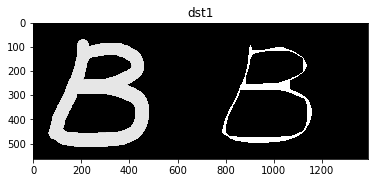

In [4]:
dst1 = cv2.erode(src_bin, None)
for i in range(17):
    dst1= cv2.erode(dst1, None)
imshow("dst1", np.hstack((src, dst1)))

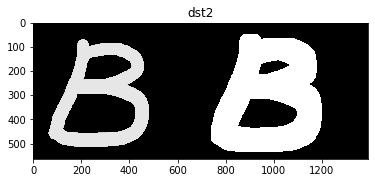

In [10]:
dst2 = cv2.dilate(src_bin, None)
for i in range(20):
    dst2= cv2.dilate(dst2, None)
imshow("dst2", np.hstack((src, dst2)))

In [ ]:
dst1= cv2.erode(src_bin, None, iterations=10)
imshow("", dst1)

In [13]:
kernel= cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
print(kernel)

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


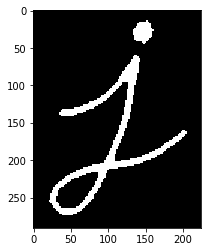

In [15]:
dst1= cv2.erode(src_bin, kernel, iterations=1)
imshow("", dst1)

### 열림 / 닫힘 연산  
- 열림: 침식연산 다음에 팽창 연산이 이어짐 
- 닫힘: 팽창 다음 침식. 제거연산의 반대  : 원래 데이터개수와 비슷해짐, 흩어져있던 것들을 뭉치는 효과 -> 홀 채우면서도 원래 픽셀형태 유지
-- 매꿔준다

- cv2.MORPH_OPEN, cv2.MORPH_CLOSE

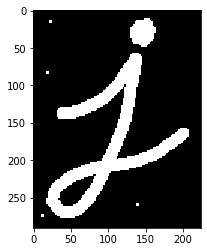

In [14]:
# 바이너리화
src= cv2.imread("open.png", cv2.IMREAD_GRAYSCALE) 
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# open
kernel = cv2.getStructure
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, None)


imshow("", dst1)


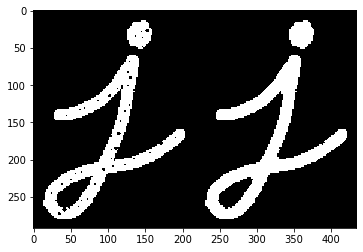

In [17]:
src= cv2.imread("close.png", cv2.IMREAD_GRAYSCALE) 
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)
imshow("", np.hstack((src_bin, dst1)))

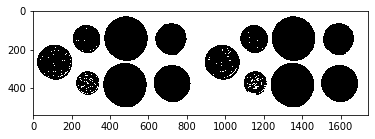

In [18]:
src= cv2.imread("coins.png", cv2.IMREAD_GRAYSCALE) 
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)
imshow("", np.hstack((src_bin, dst1)))

# 이게 배경인지, 전경인지를 생각해서,,, object를 255로 생각하고 연산하는게 편하긴 한데 
# src_bin= 255-src_bin 추가됨 

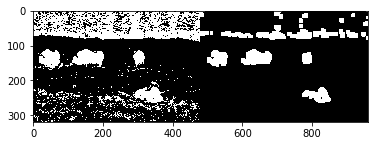

In [34]:
# 소 부분만 추출해보기 예제

src= cv2.imread("cow.jpg", cv2.IMREAD_GRAYSCALE) 
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin= 255-src_bin
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel)
imshow("", np.hstack((src_bin, dst1)))

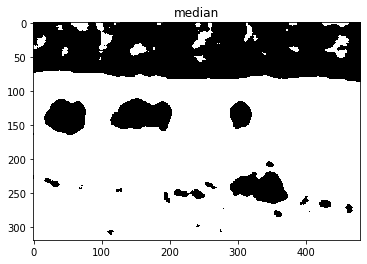

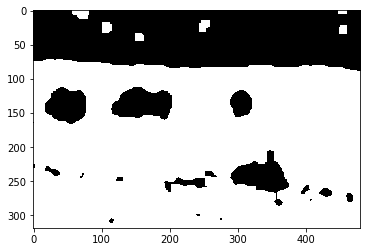

In [37]:
src= cv2.imread("cow.jpg", cv2.IMREAD_GRAYSCALE) 
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin= cv2.medianBlur(src_bin, 11)
imshow("median", src_bin)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel)
imshow("", dst1)


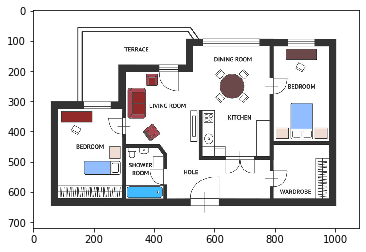

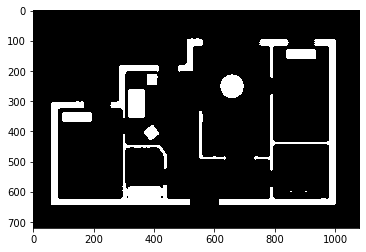

In [4]:
src = cv2.imread('draw.png', 0)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin = 255 - src_bin
src_bin = cv2.medianBlur(src_bin, 11)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, kernel)

src = cv2.imread('draw.png')
imshow("", src)
imshow("", dst1)

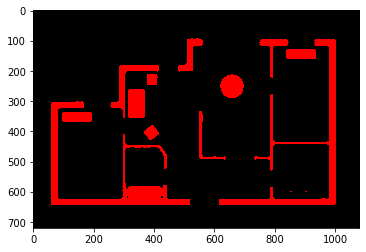

In [5]:
# 포인트연산으로 합쳐서 빨간 표시나도록
col = np.zeros((dst1.shape[0], dst1.shape[1], 3), dtype="uint8")
col[:,:,2] = dst1
imshow("", col)

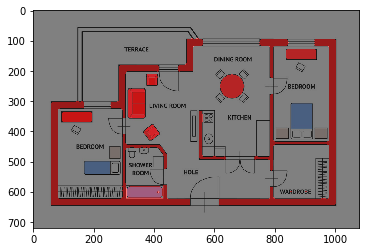

In [6]:
dst2 = cv2.addWeighted(src, 0.5, col, 0.5, 0.0)
imshow("", dst2)

## 골격화

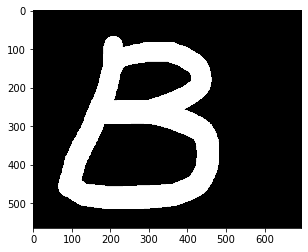

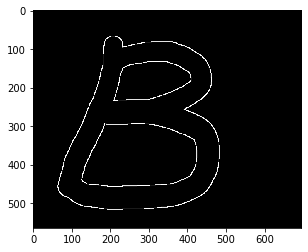

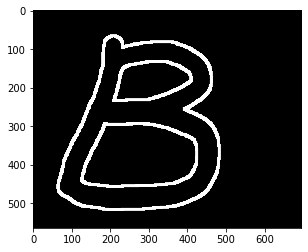

In [7]:
src = cv2.imread('letterb.png', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.morphologyEx(src, cv2.MORPH_GRADIENT, None)

imshow("", src)
imshow("", dst1)

dst1 = cv2.dilate(dst1, None, iterations=3)

imshow("", dst1)


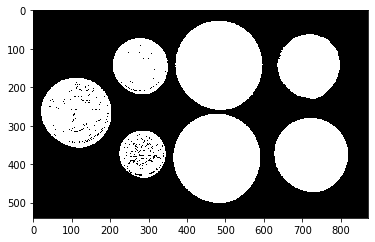

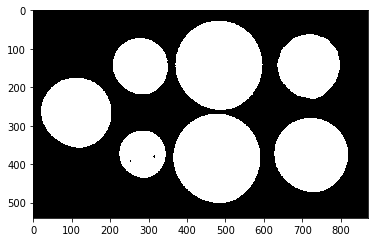

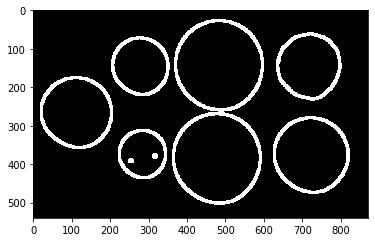

In [8]:
src = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
src_bin = 255 - src_bin

imshow("", src_bin)
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow("", dst1)

dst1 = cv2.morphologyEx(dst1, cv2.MORPH_GRADIENT, None)

dst1 = cv2.dilate(dst1, None, iterations=3)
imshow("", dst1)

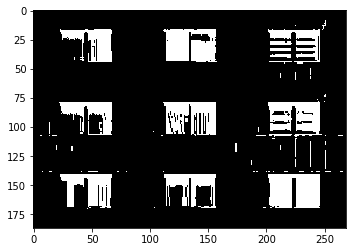

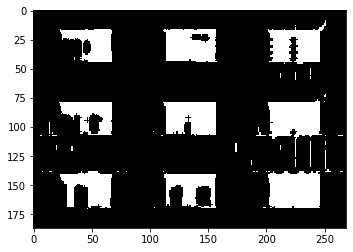

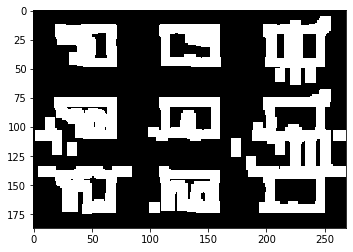

In [11]:
src = cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
src_bin = 255 - src_bin

imshow("", src_bin)
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow("", dst1)

dst1 = cv2.morphologyEx(dst1, cv2.MORPH_GRADIENT, None)

dst1 = cv2.dilate(dst1, None, iterations=3)
imshow("", dst1)



## 골격화
- 골격선을 구하는 연산으로
- open:원본영상 그대로 유지, 노이즈 약간씩 재거but 침식팽창은 원래영상보다 늘어나거나 줄어듬
침식된 영상을 다시 입력영상으로 사용해서, 
skeleton 
- letter b는 반전시키면 결과 이상하게 나옴

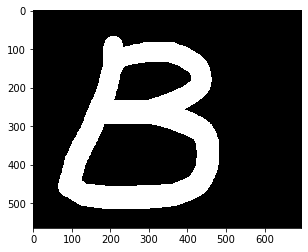

0


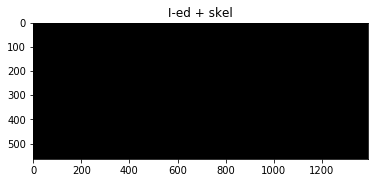

1


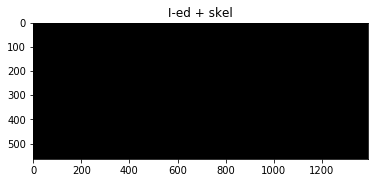

2


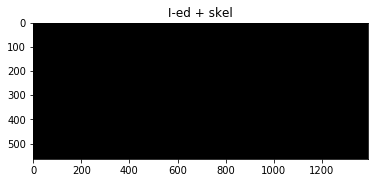

3


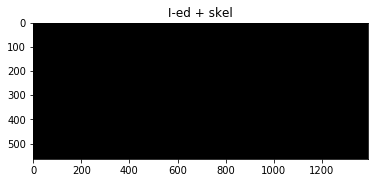

4


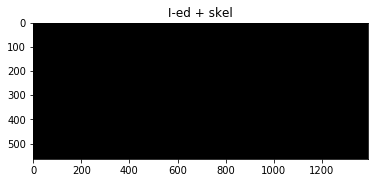

5


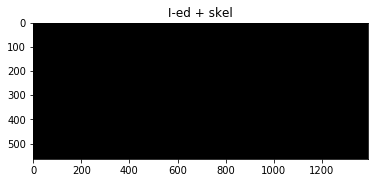

6


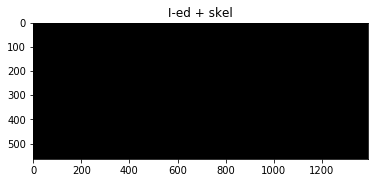

7


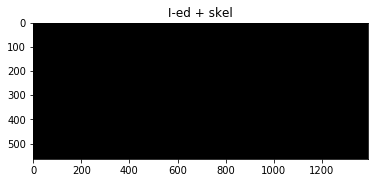

8


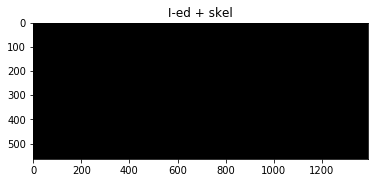

9


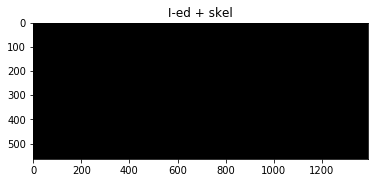

10


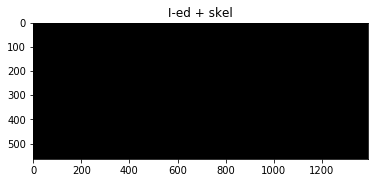

11


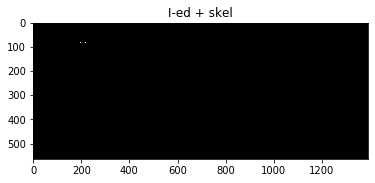

12


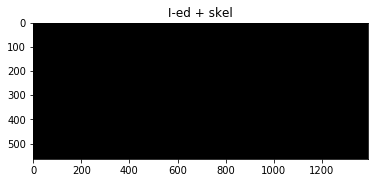

13


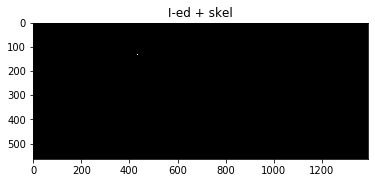

14


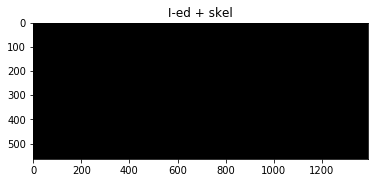

15


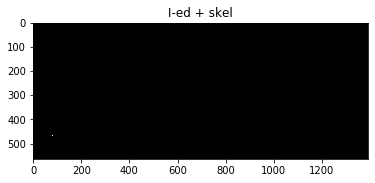

16


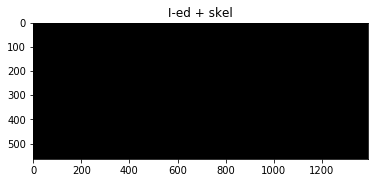

17


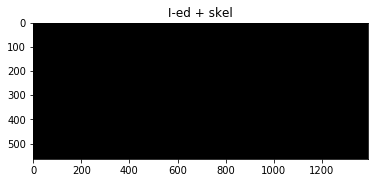

18


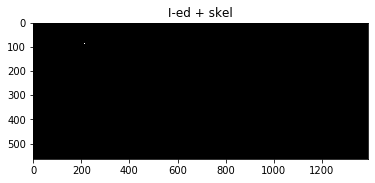

19


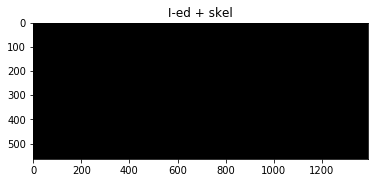

20


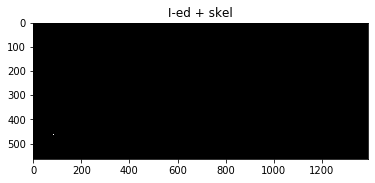

21


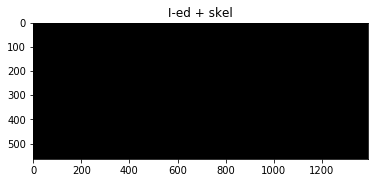

22


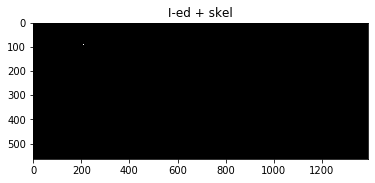

23


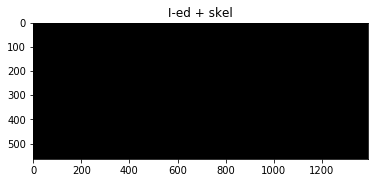

24


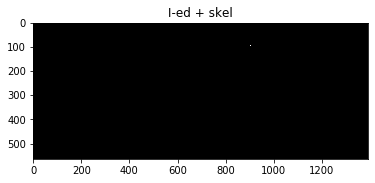

25


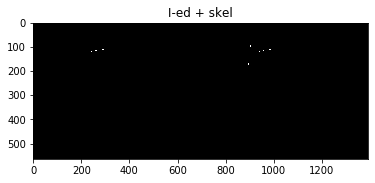

26


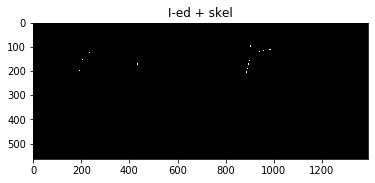

27


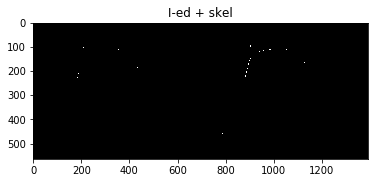

28


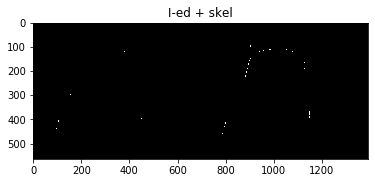

29


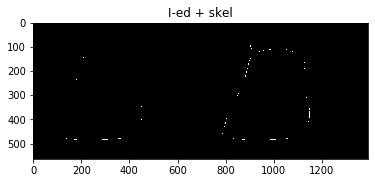

30


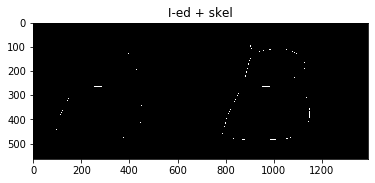

31


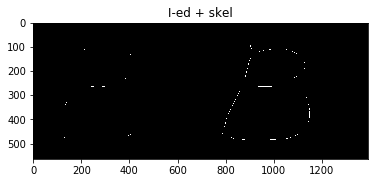

32


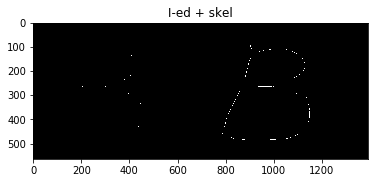

33


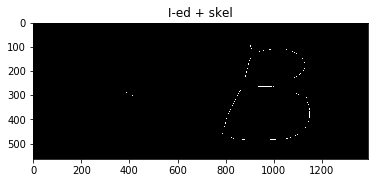

34


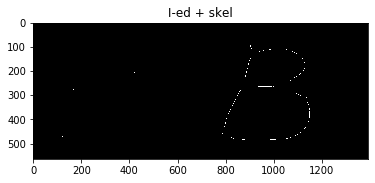

35


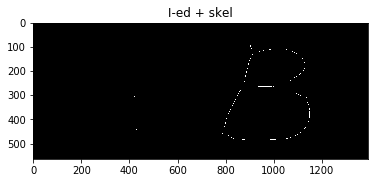

36


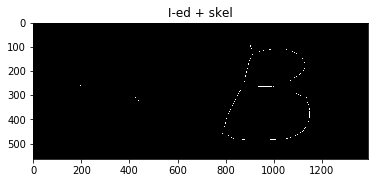

37


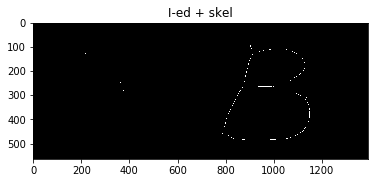

38


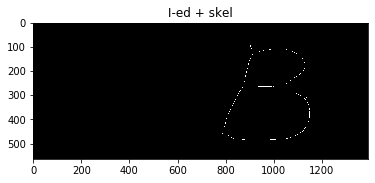

39


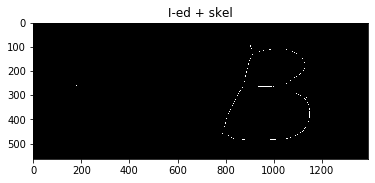

40


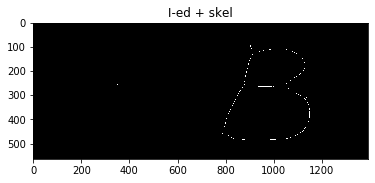

41


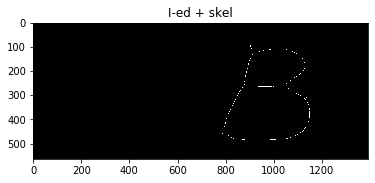

42


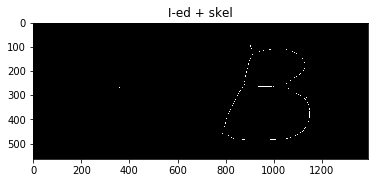

43


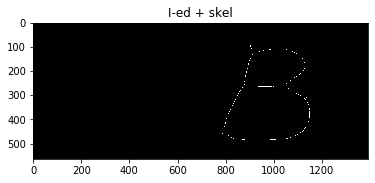

44


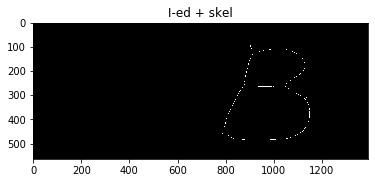

45


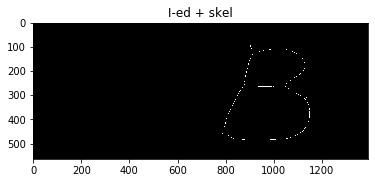

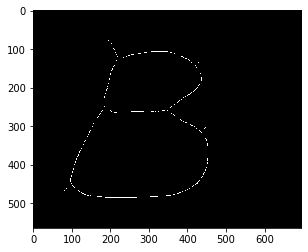

True

In [14]:
src = cv2.imread('letterb.png', cv2.IMREAD_GRAYSCALE)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#src_bin = 255 - src_bin

skel = src_bin.copy()
imshow("", src_bin)
skel[:,:] = 0
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

i = 0
while True:
        print(i)
        i += 1
        eroded = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
        temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
        temp  = cv2.subtract(src_bin, temp)
        
        skel = cv2.bitwise_or(skel, temp)
        imshow("I-ed + skel", np.hstack((temp, skel)))
        src_bin[:,:] = eroded[:,:]
        if cv2.countNonZero(src_bin) == 0:
            break
            
imshow("", skel)   
cv2.imwrite("out.png", skel)


## Color mapping
- hot, jet, hsv 많이 씀

(512, 512, 3)


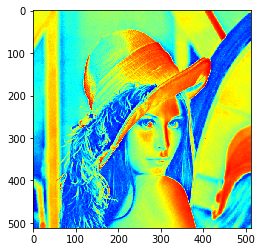

In [16]:
im_gray= cv2.imread("lenna.bmp", cv2.IMREAD_GRAYSCALE)
im_color= cv2.applyColorMap(im_gray, cv2.COLORMAP_JET)  #높낮이 나타낼때 가장 많이 씀
print(im_color.shape)
imshow("", im_color)

In [17]:
#inrange
img= cv2.imread("detectcirclesexample.png")

In [25]:
img_hsv= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red= (0,50,50)
upper_red= (10,255,255)


In [26]:
lower_red= np.array([170,50,50])
upper_red= np.array([180,255,255])
# 오렌지처럼 보이는 빨강과 찐빨강의 값이 다른거 이렇게 따로 구분해서 해주야함
# 그림판에서 찍어봤을 때 : yellow= 205, 164 / (open cv에서는 39 29 ), blue= 196,329 / (150 112)

[ 29 253 251]
[111 253 254]


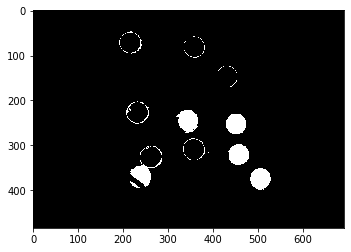

In [20]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

print(img_hsv[206,168,:])
print(img_hsv[326,411,:])
lower_red = (0, 50, 50)
upper_red = (10, 255, 255)
img_mask = cv2.inRange(img_hsv, lower_red, upper_red)
imshow("", img_mask)

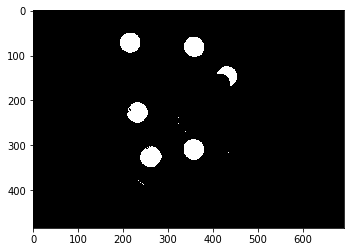

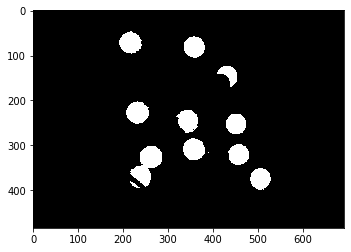

In [21]:


lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
img_mask2 = cv2.inRange(img_hsv, lower_red, upper_red)
imshow("", img_mask2)

added_red = cv2.addWeighted(img_mask, 1.0, img_mask2, 1.0, 0.0)

imshow("", added_red)

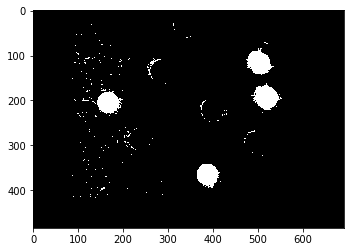

In [22]:
lower_yellow = (29-5, 50, 50)
upper_yellow = (28+5, 255, 255)

img_mask3 = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
imshow("", img_mask3)

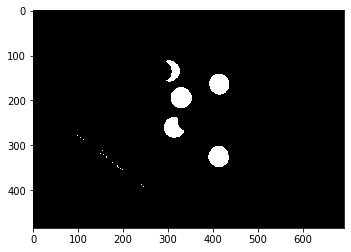

In [23]:
lower_blue = (111-5, 50, 50)
upper_blue = (111+5, 255, 255)

img_mask4 = cv2.inRange(img_hsv, lower_blue, upper_blue)
imshow("", img_mask4)

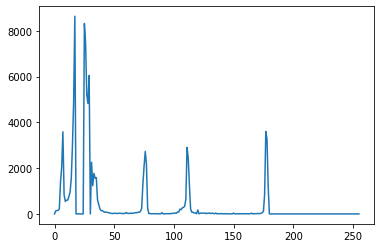

In [24]:
# 색의 분포 활용해서 찾기
hist_h = cv2.calcHist([img_hsv],[0],None,[256],[0,256])
hist_h[30] = 0
#plt.plot(hist_h)

h = np.where( hist_h > 10000)    # 만보다 큰 값을 찾아라 (index 보여줌) np.where --> 이런값들이 배경이기때문에 0으로 만들어야
hist_h[h[0]] = 0     #튜플타입이라서 이라하고 , 다 너무 커서 안보이니까 0으로 줄여버림
plt.plot(hist_h)
# plt 그래프의 peak 값이 색!!

In [ ]:
#Kmeans 
from sklearn.cluster import KMeans
X= img_hsv[:,:,0].flatten().reshape(-1,1)

In [ ]:
#cluster 개수는 (우리가 눈으로 봤을때 총 빨,노,초,,,,7개있다는 식으로) k값 모를때는 다른 알고리즘 사용
model= KMeans(n_clusters=7, init= "random", max_iter=20).fit(X)
p= model.cluster_centers)
print(p)
# 0이 배경이겠고, 개수까지 보면 우리가 제거해야할 것인지 아닌지 알수있을것

In [30]:
#처음처봤을때
a= np.array([1,4,5,20,4])

print(a>10)

b=np.where(a>4)
print(b)  #튜플값 출력
print(b[0])
a[c]=100 # 변경하고싶을때 바
print(a)

[False False False  True False]
(array([2, 3], dtype=int64),)
[2 3]
